In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [41]:
df = pd.read_csv('survey 605.csv')
#print(df.head())
print(df.columns)
print(df.count())
#print(df.describe())

Index(['Timestamp', 'What is your age?', 'What is your gender?',
       'What is your highest level of education?',
       'What is your current occupation?',
       'How often do you exercise in a week?',
       'How long have you been using a fitness wearable?',
       'How frequently do you use your fitness wearable?',
       'How often do you track fitness data using wearable?',
       'How has the fitness wearable impacted your fitness routine?',
       'Has the fitness wearable helped you stay motivated to exercise?',
       'Do you think that the fitness wearable has made exercising more enjoyable?',
       'How engaged do you feel with your fitness wearable?',
       'Does using a fitness wearable make you feel more connected to the fitness community?',
       'How has the fitness wearable helped you achieve your fitness goals?',
       'How has the fitness wearable impacted your overall health?',
       'Has the fitness wearable improved your sleep patterns?',
       'Do you f

### <mark>**Notes**</mark>

Initial inspections:
1. **Profiles features:** age, gender, education, occupation
2. **Fitness questions:** exercise frequency
3. **Wearable gears:** Have a wearable device, use frequency, feelings rating (impact, motivation, affecting exercising, engagement level, community, achieving goals, overall health, sleep impact, well-being) then 4 rating questions of wearables' influence on exercise habits.

Thoughts:
1. The dataset is predominantly surveying wearable/fitness tracker users (no yes/no questions about fitness trackers)
2. The questions are mainly designed to evaluate fitness trackers' impact on workout routines
3. Missing important features like location (suburb vs urban), type of fitness trackers, etc
4. The database is best for evaluating the correlation between health habits and frequency/time use of the tracker
5. The database has limited data (only 30 entries) so the result should be treated as a reference only
   
Cleaning needs:
1. Remove empty or error logs
2. Filter the ones without trackers
3. Data types

In [31]:
# rename the dataframe for easier calling
df_new = df.rename(columns={
    'Timestamp': 'timestamp',
    'What is your age?': 'age',
    'What is your gender?':'gender',
    'What is your highest level of education?':'education',
    'What is your current occupation?':'occupation',
    'How often do you exercise in a week?':'exercise_frequency',
    'How long have you been using a fitness wearable?':'tracker_use_time',
    'How frequently do you use your fitness wearable?':'tracker_use_frequency',
    'How often do you track fitness data using wearable?':'tracker_data_track_frequency',
    'How has the fitness wearable impacted your fitness routine?':'tracker_routine_impact',
    'Has the fitness wearable helped you stay motivated to exercise?':'tracker_motivation_impact',
    'Do you think that the fitness wearable has made exercising more enjoyable?':'tracker_enjoyable_impact',
    'How engaged do you feel with your fitness wearable?':'tracker_engagement_impact',
    'Does using a fitness wearable make you feel more connected to the fitness community?':'tracker_community_impact',
    'How has the fitness wearable helped you achieve your fitness goals?':'tracker_goal_impact',
    'How has the fitness wearable impacted your overall health?':'tracker_health_impact',
    'Has the fitness wearable improved your sleep patterns?':'tracker_sleep_impact',
    'Do you feel that the fitness wearable has improved your overall well-being?':'tracker_wellbeing_impact',
    'Has using a fitness wearable influenced your decision? [To exercise more?]':'tracker_decision_impact_rate',
    'Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?]':'tracker_purchase_impact_rate',
    'Has using a fitness wearable influenced your decision? [To join a gym or fitness class?]':'tracker_gymclass_impact_rate',
    'Has using a fitness wearable influenced your decision? [To change your diet?]':'tracker_diet_impact_rate',
    # Add more as needed
}, inplace=False)

# print the new columns
print(df_new.columns)

# start with examining the empty or error data
print(df_new[df_new.isnull().any(axis=1)])
# no empty data


Index(['timestamp', 'age', 'gender', 'education', 'occupation',
       'exercise_frequency', 'tracker_use_time', 'tracker_use_frequency',
       'tracker_data_track_frequency', 'tracker_routine_impact',
       'tracker_motivation_impact', 'tracker_enjoyable_impact',
       'tracker_engagement_impact', 'tracker_community_impact',
       'tracker_goal_impact', 'tracker_health_impact', 'tracker_sleep_impact',
       'tracker_wellbeing_impact', 'tracker_decision_impact_rate',
       'tracker_purchase_impact_rate', 'tracker_gymclass_impact_rate',
       'tracker_diet_impact_rate'],
      dtype='object')
Empty DataFrame
Columns: [timestamp, age, gender, education, occupation, exercise_frequency, tracker_use_time, tracker_use_frequency, tracker_data_track_frequency, tracker_routine_impact, tracker_motivation_impact, tracker_enjoyable_impact, tracker_engagement_impact, tracker_community_impact, tracker_goal_impact, tracker_health_impact, tracker_sleep_impact, tracker_wellbeing_impact, tracker_

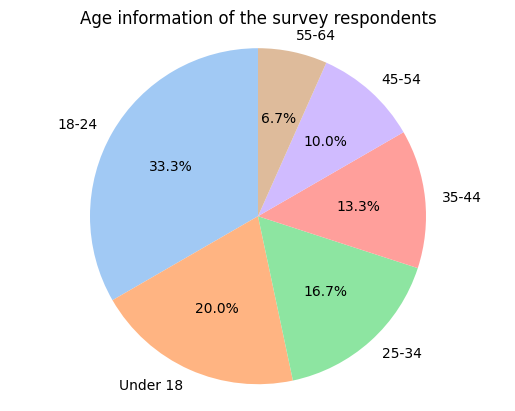

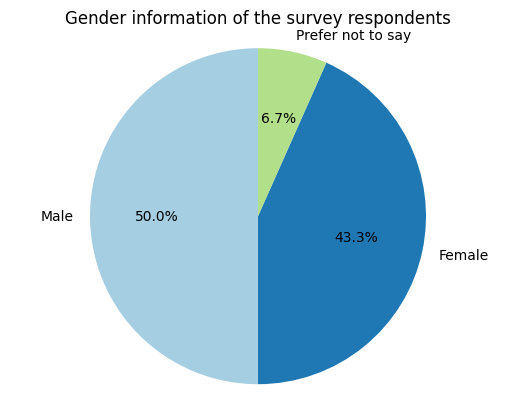

In [178]:
# examine the age data in this table
colors = sns.color_palette("pastel")

plt.pie(df_new.age.value_counts(), 
        labels=df_new.age.unique(),
        colors = colors,
        autopct='%1.1f%%', 
        startangle=90)
plt.axis('equal')
plt.title('Age information of the survey respondents')
plt.show()

# examine the gender data
colors = sns.color_palette("Paired")

plt.pie(df_new.gender.value_counts(), 
        labels=df_new.gender.unique(),
        colors = colors,
        autopct='%1.1f%%', 
        startangle=90)
plt.axis('equal')
plt.title('Gender information of the survey respondents')
plt.show()


['Less than 6 months', '6-12 months', '1-2 years', 'More than 2 years']
Categories (4, object): ['Less than 6 months' < '6-12 months' < '1-2 years' < 'More than 2 years']
count                     30
unique                     4
top       Less than 6 months
freq                      13
Name: tracker_use_time, dtype: object


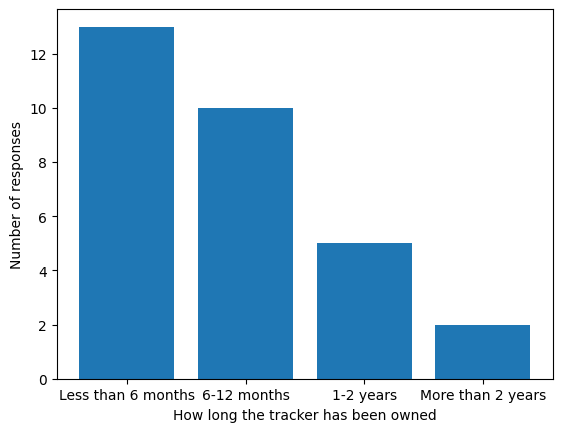

In [40]:
# examine the tracker_use_time column aka who has trackers
print(df_new.tracker_use_time.unique())

# notes: no option for 'don't have a tracker' assuming the data is cleaned before

# create a ranking of the categorical description 
order_tracker_use_time = ['Less than 6 months' ,'6-12 months', '1-2 years' ,'More than 2 years']
df_new.tracker_use_time = pd.Categorical(df_new.tracker_use_time, categories=order_tracker_use_time, ordered=True)
print(df_new.tracker_use_time.describe())

# create a box gram to examine the distribution
plt.bar(order_tracker_use_time, df_new.tracker_use_time.value_counts())
plt.xlabel('How long the tracker has been owned')
plt.ylabel('Number of responses')
plt.show()

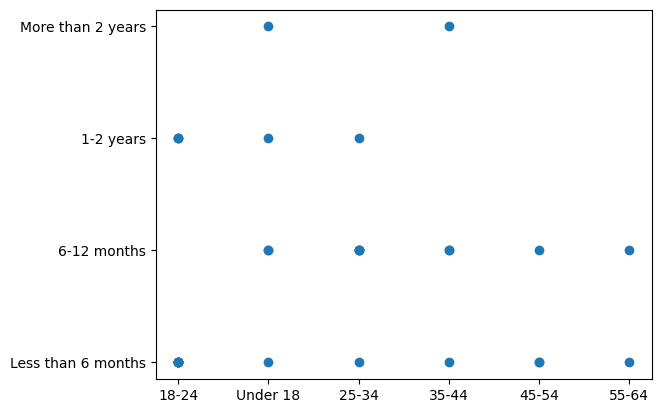

In [183]:
# tracker owning vs age
plt.scatter(df_new.age, df_new.tracker_use_time)
plt.show()

['Daily', '3-4 times a week', 'Rarely', '1-2 times a week']
Categories (4, object): ['Rarely' < '1-2 times a week' < '3-4 times a week' < 'Daily']
count                   30
unique                   4
top       3-4 times a week
freq                    11
Name: tracker_use_frequency, dtype: object


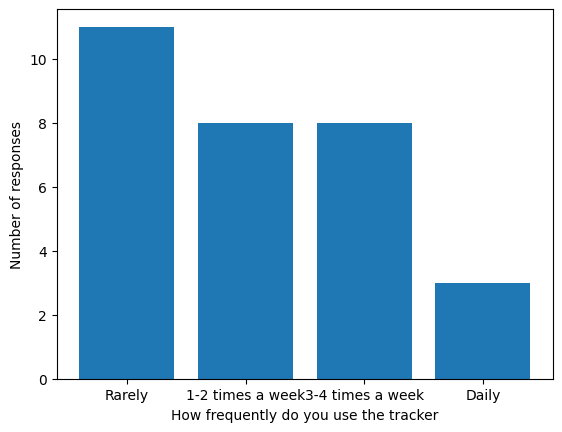

In [87]:
# inspect frequency column and assign orders
print(df_new.tracker_use_frequency.unique())

order_tracker_use_frequency = ['Rarely','1-2 times a week','3-4 times a week','Daily']
df_new.tracker_use_frequency = pd.Categorical(df_new.tracker_use_frequency, categories=order_tracker_use_frequency, ordered=True)
print(df_new.tracker_use_frequency.describe())

plt.bar(order_tracker_use_frequency, df_new.tracker_use_frequency.value_counts())
plt.xlabel('How frequently do you use the tracker')
plt.ylabel('Number of responses')
plt.show()

<Mark>Only two people have the tracker for more than 2 years in this database so the responses are too biased</Mark>

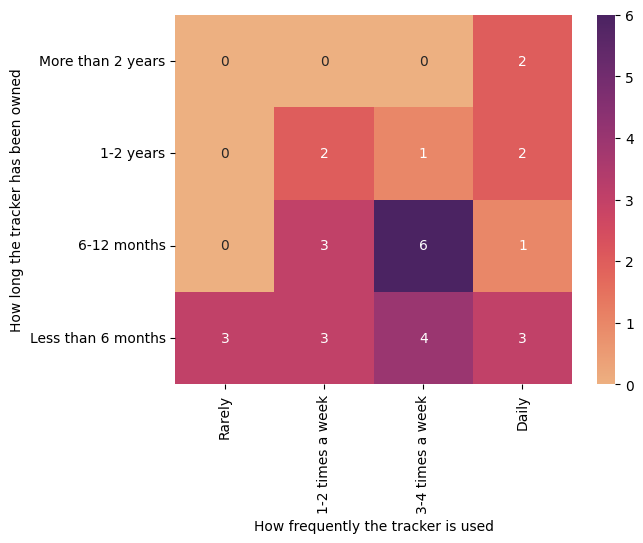

In [68]:
# plot usage time vs frequency

plt.clf()
cross_tab = pd.crosstab(df_new.tracker_use_time, df_new.tracker_use_frequency)
sns.heatmap(cross_tab, annot=True, cmap='flare')
plt.gca().invert_yaxis()
plt.xlabel('How frequently the tracker is used')
plt.ylabel('How long the tracker has been owned')

plt.show()

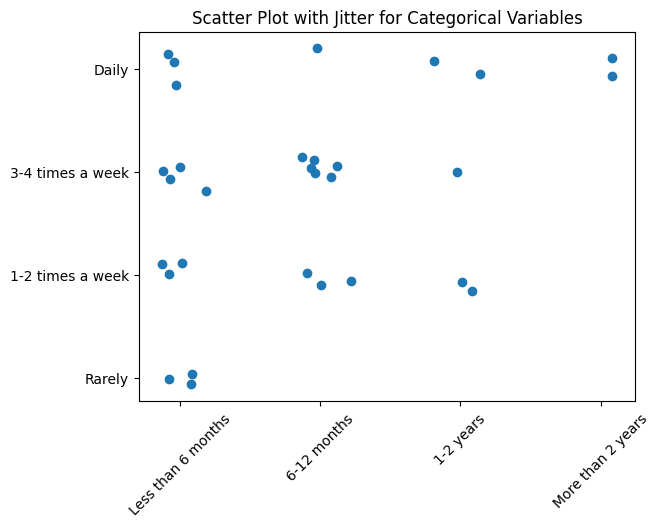

In [77]:
# remap with scatterplot + jitter

# create jitter 
x_jitter = np.random.normal(0, 0.1, len(df_new.tracker_use_time))
y_jitter = np.random.normal(0, 0.1, len(df_new.tracker_use_frequency))

# add numerical values to categories for plotting
df['usage_num'] = pd.Categorical(df_new.tracker_use_time).codes
df['frequency_num'] = pd.Categorical(df_new.tracker_use_frequency).codes

plt.scatter(df['usage_num'] + x_jitter, df['frequency_num'] + y_jitter)
plt.xticks(ticks=range(len(order_tracker_use_time)), labels=order_tracker_use_time, rotation=45)
plt.yticks(ticks=range(len(order_tracker_use_frequency)), labels=order_tracker_use_frequency)
plt.title('Scatter Plot with Jitter for Categorical Variables')

plt.show()


### <Mark>**Notes-2**</Mark>

From the heatmap, there seems to be a usage drop once someone has owned the tracker for more than 2 years. But with the scatterplot, it's very clear that there are too few responses to draw a correlation collusion between usage frequency and time of owning a tracker. 

For people who own a fitness tracker for less than a year, most people would use it frequently.

['Every day', 'Once a week', 'Rarely', 'Every other day', 'Once a month']
Categories (5, object): ['Rarely' < 'Once a month' < 'Once a week' < 'Every other day' < 'Every day']
count            30
unique            5
top       Every day
freq              9
Name: tracker_data_track_frequency, dtype: object


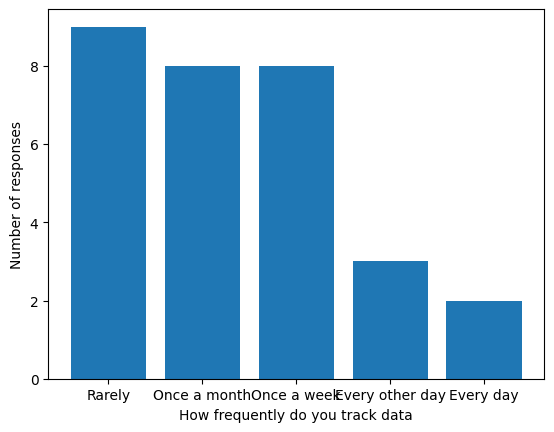

In [138]:
# examine the responses of data tracking frequency
print(df_new.tracker_data_track_frequency.unique())

# oder the labels
order_data_track_frequency = ['Rarely','Once a month','Once a week','Every other day','Every day']
df_new.tracker_data_track_frequency = pd.Categorical(df_new.tracker_data_track_frequency, categories=order_data_track_frequency, ordered=True)

print(df_new.tracker_data_track_frequency.describe())

# create a graph
plt.bar(order_data_track_frequency, df_new.tracker_data_track_frequency.value_counts())
plt.xlabel('How frequently do you track data')
plt.ylabel('Number of responses')
plt.show()

['Positive impact' 'Not sure' 'Neutral impact' 'Negative impact'
 'Very positive impact' 'Very negative impact']


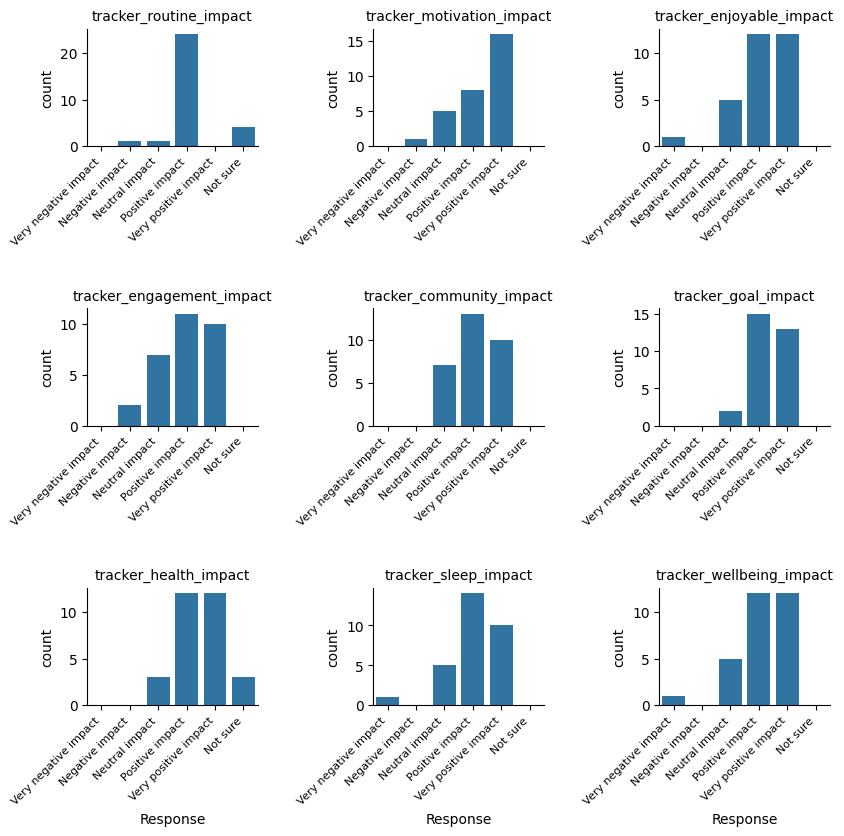

In [152]:
# to quickly map the evaluation questions, pick up all 10 questions and answers

columns = ['tracker_routine_impact',
       'tracker_motivation_impact', 'tracker_enjoyable_impact',
       'tracker_engagement_impact', 'tracker_community_impact',
       'tracker_goal_impact', 'tracker_health_impact', 'tracker_sleep_impact',
       'tracker_wellbeing_impact']

df_evaluation = df_new[columns]
#print(df_evaluation.describe())
#print(df_evaluation.tracker_motivation_impact.unique())


# melt df_evaluation into a bigger dataframe
df_evaluation_melt = df_evaluation.melt(var_name='Question', value_name='Response')
#print(df_evaluation_melt.describe())

# update the responses to be consistent
#print(df_evaluation_melt.Response.unique())
response_update = ['Very negative impact','Negative impact','Neutral impact','Positive impact','Very positive impact','Not sure']

replace = {
    'Negatively impacted my fitness routine':'Negative impact',
    'No impact on my fitness routine':'Neutral impact',
    'Positively impacted my fitness routine':'Positive impact',
    "I don't know":'Not sure',
    'Very engaged':'Very positive impact',
    'Somewhat engaged':'Positive impact',
    'Not very engaged':'Negative impact',
    'No impact on achieving my goals':'Neutral impact',
    'Helped me achieve my goals somewhat more quickly':'Positive impact',
    'Helped me achieve my goals much more quickly':'Very positive impact',
    'No impact on my overall health':'Neutral impact',
    'Improved my overall health somewhat':'Positive impact',
    'Improved my overall health significantly':'Very positive impact',
    'Strongly agree':'Very positive impact',
    'Neutral':'Neutral impact',
    'Agree':'Positive impact',
    'Strongly disagree':'Negative impact',
    'Disagree':'Very negative impact'
}

df_evaluation_melt['Response'] = df_evaluation_melt['Response'].replace(replace)
print(df_evaluation_melt.Response.unique())

# create a big graph of all of the questions

graph = sns.FacetGrid(df_evaluation_melt, col="Question", col_wrap=3, sharey=False, sharex=False)
graph.map(sns.countplot, "Response", order=response_update)

#plt.xticks(ticks=range(len(response_update)), labels=response_update, rotation=45)
for ax in graph.axes.flat:
    ax.set_xticks(range(len(response_update)))
    ax.set_xticklabels(response_update, rotation=45, ha='right',fontsize=8)
graph.set_titles("{col_name}")
plt.tight_layout(pad=3)

plt.show()

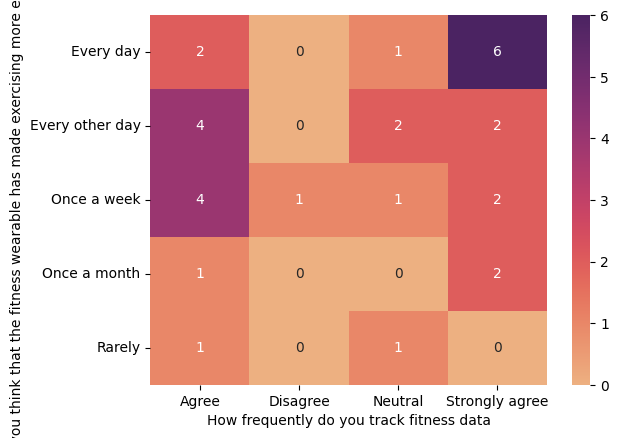

In [154]:
# examine the relationship between the frequency of tracking data and enjoyable 

plt.clf()
cross_tab = pd.crosstab(df_new.tracker_data_track_frequency, df_new.tracker_enjoyable_impact)
sns.heatmap(cross_tab, annot=True, cmap='flare')
plt.gca().invert_yaxis()
plt.xlabel('How frequently do you track fitness data')
plt.ylabel('Do you think that the fitness wearable has made exercising more enjoyable?')

plt.show()

#### <Mark>Recommendations </Mark>

1. The sample size of the survey is too small - recommend a larger sample to draw a reliable conclusion. Only 2 people have had a tracker for more than 2 years so it's hard to draw a correlation between how long using a fitness tracker vs all fitness/health routine changes
2. The questions and responses have very inconsistent formats which makes it hard to clean up. Would recommend sticking with the same type of questions and answer types.
3. It would be interesting to compare the ones who use a fitness tracker vs the ones who don't for certain routine questions
   